# Analysis Phase

## Numerical Data Analysis

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import datetime
##from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
import warnings
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
import joblib

%matplotlib inline

In [4]:
## We will analyze the last 15 years stock price data of BSE Sensex

df = pd.read_csv("C:/Users/soham/OneDrive/Desktop/ML Project/historical_data.csv")

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-06-30,7154.270020,7218.279785,7154.270020,7193.850098,7193.850098,28600.0
1,2005-07-01,7165.450195,7228.569824,7154.930176,7210.770020,7210.770020,12600.0
2,2005-07-04,7186.740234,7284.410156,7186.740234,7277.310059,7277.310059,9600.0
3,2005-07-05,7275.000000,7308.720215,7209.859863,7220.250000,7220.250000,12600.0
4,2005-07-06,7227.220215,7296.180176,7227.220215,7287.600098,7287.600098,13400.0


In [22]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3695,2020-06-23,35015.730469,35482.160156,34843.691406,35430.429688,35430.429688,25200.0
3696,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0
3697,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0
3698,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0
3699,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0


In [23]:
type(df['Date'][0])

str

In [24]:
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-06-30,7154.270020,7218.279785,7154.270020,7193.850098,7193.850098,28600.0
1,2005-07-01,7165.450195,7228.569824,7154.930176,7210.770020,7210.770020,12600.0
2,2005-07-04,7186.740234,7284.410156,7186.740234,7277.310059,7277.310059,9600.0
3,2005-07-05,7275.000000,7308.720215,7209.859863,7220.250000,7220.250000,12600.0
4,2005-07-06,7227.220215,7296.180176,7227.220215,7287.600098,7287.600098,13400.0


In [26]:
df.set_index('Date',inplace=True,drop=False)

In [27]:
df.dropna(inplace=True)

In [28]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2005-06-30,2005-06-30,7154.270020,7218.279785,7154.270020,7193.850098,7193.850098,28600.0
2005-07-01,2005-07-01,7165.450195,7228.569824,7154.930176,7210.770020,7210.770020,12600.0
2005-07-04,2005-07-04,7186.740234,7284.410156,7186.740234,7277.310059,7277.310059,9600.0
2005-07-05,2005-07-05,7275.000000,7308.720215,7209.859863,7220.250000,7220.250000,12600.0
2005-07-06,2005-07-06,7227.220215,7296.180176,7227.220215,7287.600098,7287.600098,13400.0


In [29]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3672,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03
mean,2012-12-25 11:22:44.705882368,22217.613841,22349.805309,22041.222145,22191.865366,22191.865366,1.035519e+05
min,2005-06-30 00:00:00,7154.270020,7218.279785,7123.109863,7145.129883,7145.129883,8.000000e+02
25%,2009-03-26 18:00:00,16042.179688,16214.007813,15867.542481,16035.654785,16035.654785,1.060000e+04
50%,2012-12-25 00:00:00,19592.879883,19718.844727,19448.019532,19590.979493,19590.979493,1.440000e+04
75%,2016-09-28 06:00:00,28270.249512,28395.725098,28098.396973,28229.640625,28229.640625,2.040000e+04
max,2020-06-29 00:00:00,42263.000000,42273.871094,41850.289063,41952.628906,41952.628906,3.181510e+07
std,NaN,8802.918993,8814.874438,8763.852817,8784.033920,8784.033920,1.234281e+06


### Using ARIMA Data Analysis

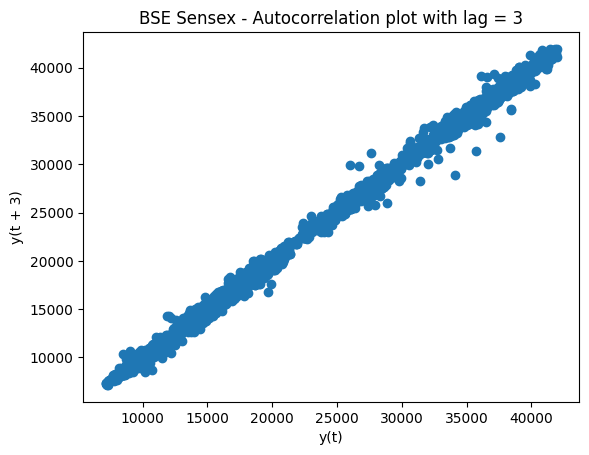

In [30]:
## Checking for Cross-correlation

plt.figure()
lag_plot(df['Close'], lag=3)
plt.title('BSE Sensex - Autocorrelation plot with lag = 3')
plt.show()

#### There is an auto correlation for lag=3 (i.e the data of current day is correlated to previous 3 days' data)

### Visualize Plot

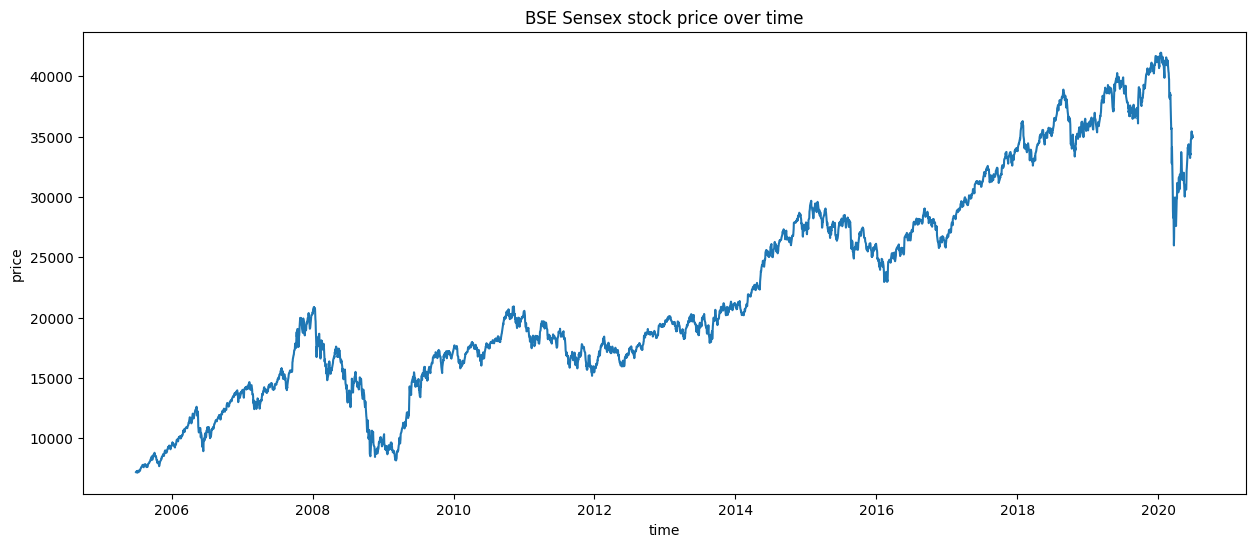

In [31]:
plt.figure(figsize=(15,6))
plt.plot(df["Close"])
plt.title("BSE Sensex stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

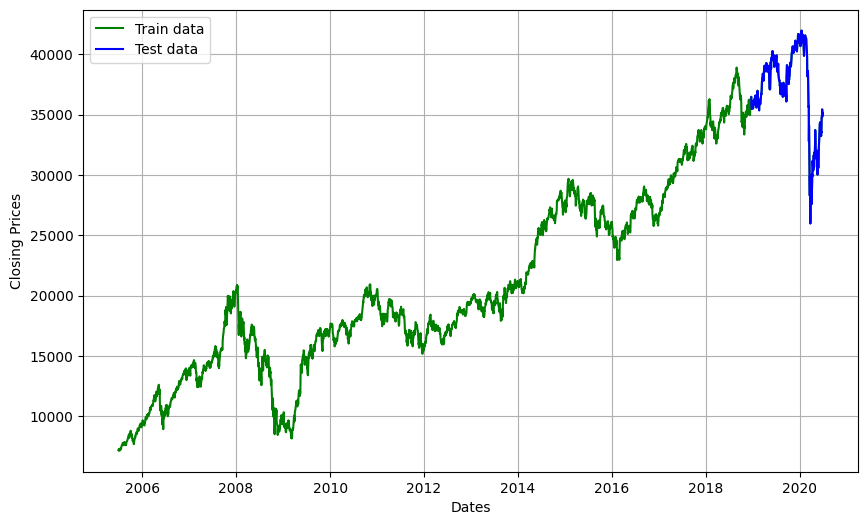

In [32]:
#split data into train and training set

train_data, test_data = df[:int(len(df)*0.9)], df[int(len(df)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df['Close'], 'green', label='Train data')
plt.plot(test_data['Close'], 'blue', label='Test data')
plt.legend()

In [33]:
# The auto_arima function seeks to identify the 
# most optimal parameters for an ARIMA model, and returns a fitted ARIMA model. 

model_autoARIMA = auto_arima(train_data['Close'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=45538.079, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=45520.656, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=45520.197, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=45540.646, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=45522.080, Time=0.67 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=45521.980, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=45523.932, Time=0.56 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=45522.119, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.658 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3304
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -22757.099
Date:                Fri, 12 Apr 2024   AIC                          45520.197
Time:                       

In [34]:
warnings.filterwarnings("ignore")

# Fitting the ARIMA model
model = ARIMA(train_data['Close'], order=(0,1,1))  
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3304
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -22759.060
Date:                Fri, 12 Apr 2024   AIC                          45522.119
Time:                        01:48:48   BIC                          45534.324
Sample:                             0   HQIC                         45526.488
                               - 3304                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0795      0.014      5.672      0.000       0.052       0.107
sigma2      5.662e+04    818.925     69.140      0.000     5.5e+04    5.82e+04
Ljung-Box (L1) (Q):                   0.01   Jarque-

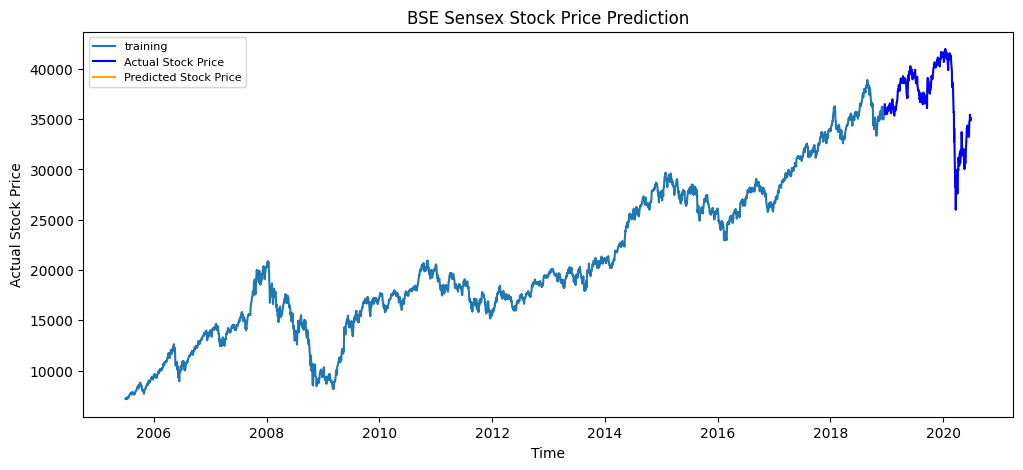

In [36]:
# Forecast
forecast_values = fitted.forecast(steps=368, alpha=0.05)
stderr = fitted.forecast(steps=368, alpha=0.05)
conf_int = fitted.forecast(steps=368, alpha=0.05)  # 95% confidence

# Create series for forecast values, lower and upper confidence intervals
fc_series = pd.Series(forecast_values, index=test_data.index)


# Plotting
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data['Close'], label='training')
plt.plot(test_data['Close'], color='blue', label='Actual Stock Price')
plt.plot(fc_series, color='orange', label='Predicted Stock Price')
#plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=.2, label='95% Confidence Interval')
plt.title('BSE Sensex Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [37]:
# report performance
forecast_values = np.clip(forecast_values, 0, None)
mse = mean_squared_error(test_data['Close'], forecast_values)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data['Close'], forecast_values)
print('MAE: '+str(mae))
rmse = sqrt(mean_squared_error(test_data['Close'], forecast_values))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(forecast_values - test_data['Close'])/np.abs(test_data['Close']))
mape = 0.07676215004310963
print('MAPE: '+str(mape))

MSE: 11755241.14126058
MAE: 2809.929604347766
RMSE: 3428.591713992872
MAPE: 0.07676215004310963


#### Around 7.6% MAPE(Mean Absolute Percentage Error) implies the model is about 92.4% accurate in predicting the test set observations.

## Using LSTM Analysis

In [38]:
stock1 = df["Close"].copy()
stock1 = pd.DataFrame(stock1)

In [39]:
stock1

,Close
Date,
2005-06-30,7193.850098
2005-07-01,7210.770020
2005-07-04,7277.310059
2005-07-05,7220.250000
2005-07-06,7287.600098
...,...
2020-06-23,35430.429688
2020-06-24,34868.980469
2020-06-25,34842.101563


In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(stock1)

In [41]:
df1.shape

(3672, 1)

In [42]:
## Train test split

train_size = int(len(df1)*0.9)
test_size = len(df1) - train_size
initial_train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [43]:
train_size,test_size

(3304, 368)

In [44]:
## Validation Data

train_data,cv_data = initial_train_data[0:int(len(initial_train_data)*0.8)],initial_train_data[int(len(initial_train_data)*0.8):]

In [45]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [46]:
time_step = 60
Xtrain, ytrain = create_dataset(train_data, time_step)
Xtest, ytest = create_dataset(test_data, time_step)
Xcv,ycv = create_dataset(cv_data, time_step)

In [47]:
print(Xtrain.shape), print(ytrain.shape)

(2582, 60)
(2582,)


(None, None)

In [48]:
print(Xtest.shape), print(ytest.shape)

(307, 60)
(307,)


(None, None)

In [49]:
# reshape input to be [samples, time steps, features] which is required for LSTM
Xtrain =Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1] , 1)
Xtest = Xtest.reshape(Xtest.shape[0],Xtest.shape[1] , 1)
Xcv = Xcv.reshape(Xcv.shape[0],Xcv.shape[1] , 1)

In [50]:

### Create the Stacked LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [51]:
#Defining our metric
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [52]:
## LSTM Model Initialization
model = Sequential()
model.add(LSTM(units=128, activation='tanh', kernel_initializer=tf.keras.initializers.glorot_uniform(seed=26), input_shape = (Xtrain.shape[1], 1), unroll = True))
model.add(Dense(1, name="output_layer"))
model.compile(optimizer = Adam(learning_rate=0.001), loss = root_mean_squared_error)

In [53]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.fit(Xtrain,ytrain,validation_data=(Xcv,ycv),epochs=100,batch_size=16,verbose=1)

Epoch 1/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - loss: 0.0595 - val_loss: 0.0282
Epoch 2/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0137 - val_loss: 0.0183
Epoch 3/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0130 - val_loss: 0.0105
Epoch 4/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0120 - val_loss: 0.0105
Epoch 5/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0111 - val_loss: 0.0094
Epoch 6/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0109 - val_loss: 0.0076
Epoch 7/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0097 - val_loss: 0.0078
Epoch 8/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0094 - val_loss: 0.0069
Epoch 9/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0092 - val_loss: 0.0077
Epoch 10/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0090 - val_loss: 0.0071
Epoch 11/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0085 - val_loss: 0.0094
Epoch 12/100
162/162 ━━━━━━━━

In [57]:
### Prediction and check performance metrics
train_predict=model.predict(Xtrain)
test_predict=model.predict(Xtest)

81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [58]:
### Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [59]:
rescaled_ytrain = scaler.inverse_transform(ytrain.reshape(-1, 1))
rescaled_ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [60]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(rescaled_ytrain,train_predict))

243.5093431063577

In [61]:
# report performance
mse = mean_squared_error(rescaled_ytest,test_predict)
print('MSE: '+str(mse))
mae = mean_absolute_error(rescaled_ytest,test_predict)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(rescaled_ytest,test_predict))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(test_predict - rescaled_ytest)/np.abs(rescaled_ytest))
print('MAPE: '+str(mape))

MSE: 659522.1917501785
MAE: 666.4911123859931
RMSE: 812.1097165717072
MAPE: 0.018136382770682885


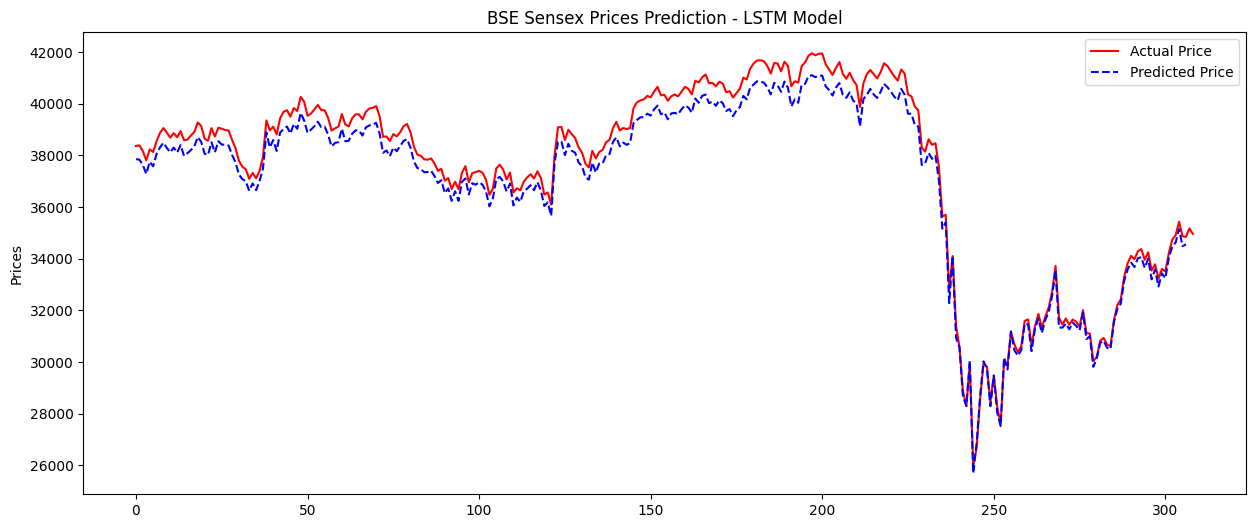

In [62]:
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(df1[3363:,]),color='red', label='Actual Price')
plt.plot(test_predict, color='blue', linestyle='dashed',label='Predicted Price')
plt.title('BSE Sensex Prices Prediction - LSTM Model')
plt.ylabel('Prices')
plt.legend()
plt.show()

## Observations:

### It seems that there has been a great fall in stock market price in the time period of March 2020 - May 2020. This is mainly due to lockdown announcement made by Indian Government in March 2020 due to COVID-19. So we will target the time period of 30-06-2019 to 29-06-2020 in this task.
### So, the prediction models results in error during this time period. 

# Text Data Analysis

In [63]:
from datetime import datetime
import string
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [56]:
text = pd.read_csv("C:/Users/soham/OneDrive/Desktop/ML Project/india-news-headlines.csv")

In [64]:
text.shape

(3650970, 3)

In [65]:
text.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [66]:
text.tail()

,publish_date,headline_category,headline_text
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...
3650969,20220331,city.salem,Tamil Nadu sees marginal rise of Covid cases w...


In [67]:
text['publish_date'] = pd.to_datetime(text['publish_date'],format='%Y%m%d')

### Since, we only have the the numerical data between 30-06-2005 to 29-06-2020, we will only use the text data generated during these dates

In [68]:
text1 = text[text['publish_date']> '2005-06-29'].reset_index(drop=True)

In [69]:
text1.shape

(3289529, 3)

### Since, we are doing a stock price prediction, we only need data related to business

In [70]:
headline_cats = [cat for cat in text1['headline_category'].value_counts().index if 'business' in cat]

In [71]:
headline_cats

['business.india-business',
 'business.international-business',
 'business.personal-finance',
 'business',
 'india-business-news-wire',
 'business.faqs.income-tax-faqs',
 'business.mf-simplified.mf-news',
 'business.mf-simplified.jargon-busters.debt',
 'business.markets.ipo',
 'business.faqs.aadhar-faqs',
 'business.markets.sensex',
 'business.wealth.loans-and-emi',
 'business.startups.companies',
 'business.mf-simplified.jargon-busters.equity',
 'business.mf-simplified.faq',
 'business.cryptocurrency.bitcoin',
 'business.faqs.gst-faqs']

In [72]:
text1 = text1.loc[text1['headline_category'].str.find('business') !=-1].reset_index(drop=True)

In [73]:
text1.head()

,publish_date,headline_category,headline_text
0,2005-07-01,business.india-business,BK Birla group pens Rs 1;000-cr investment plan
1,2005-07-01,business.india-business,Acquisitions are way forward: Paul
2,2005-07-01,business.india-business,Central PSUs get purchase preference in govt o...
3,2005-07-01,business.india-business,Govt removes hurdles for GM to buy Daewoo Indi...
4,2005-07-01,business.india-business,Anil Ambani to make it big in entertainment


### Joining the rows of the same date

In [74]:
text2 = text1.groupby('publish_date').agg({'headline_category':'first','headline_text': '. '.join}).reset_index()

In [75]:
text2.head()

,publish_date,headline_category,headline_text
0,2005-07-01,business.india-business,BK Birla group pens Rs 1;000-cr investment pla...
1,2005-07-02,business.india-business,Retail boom triggers ancillary industry growth...
2,2005-07-03,business.india-business,India ideal for KPO industry. Airlines facing ...
3,2005-07-04,business.india-business,Global CEOs; Indian owners: Why the strains ar...
4,2005-07-05,business.india-business,Finolex Cables to forward integrate operations...


In [76]:
text2.shape

(6053, 3)

In [77]:
text2['headline_text'] = text2['headline_text'].str.lower()

In [78]:
count = 0
for text in text2['headline_text']:
    if 'bse' in text or 'sensex' in text :
        count+=1

In [79]:
count

3555

#### Sensex or BSE occurs 3555 times in the whole dataset

In [80]:
from nltk import sent_tokenize

def actual_news(data):
    for index in data.index:
        sentences = sent_tokenize(data['headline_text'][index])
        relevant_line = ' '.join(sent for sent in sentences if 'sensex' in sent or 'bse' in sent)
        if len(relevant_line)>5:
            data['headline_text'][index] =relevant_line
    return data

In [81]:
text3 = actual_news(text2)

In [82]:
text3.head()

,publish_date,headline_category,headline_text
0,2005-07-01,business.india-business,bk birla group pens rs 1;000-cr investment pla...
1,2005-07-02,business.india-business,retail boom triggers ancillary industry growth...
2,2005-07-03,business.india-business,india ideal for kpo industry. airlines facing ...
3,2005-07-04,business.india-business,global ceos; indian owners: why the strains ar...
4,2005-07-05,business.india-business,finolex cables to forward integrate operations...


In [83]:
# Cleaning the text
from nltk import word_tokenize

def clean_txt(text):
    # Removing non alphanumeric text
    text = re.sub('[^a-zA-Z]',' ',text)
    return text

In [84]:
text1['headline_text'] = text1['headline_text'].apply(clean_txt)
text3['headline_text'] = text3['headline_text'].apply(clean_txt)

In [85]:
headlines = list(text1['headline_text'])

In [86]:
# Sentiment Analysis

score=[]
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [89]:
# Stock Market Lexicon to update the sentiment analyzer to analyze business news
import csv

stock_lex = pd.read_csv("C:/Users/soham/OneDrive/Desktop/ML Project/stock_lex.csv")
stock_lex['sentiment'] = (stock_lex['Aff_Score'] + stock_lex['Neg_Score'])/2
stock_lex = dict(zip(stock_lex.Item, stock_lex.sentiment))
stock_lex = {k:v for k,v in stock_lex.items() if len(k.split(' '))==1}
stock_lex_scaled = {}
for k, v in stock_lex.items():
    if v > 0:
        stock_lex_scaled[k] = v / max(stock_lex.values()) * 4
    else:
        stock_lex_scaled[k] = v / min(stock_lex.values()) * -4

# Loughran and McDonald
positive = []
with open("C:/Users/soham/OneDrive/Desktop/ML Project/lm_positive.csv", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        positive.append(row[0].strip())
    
negative = []
with open("C:/Users/soham/OneDrive/Desktop/ML Project/lm_negative.csv", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        entry = row[0].strip().split(" ")
        if len(entry) > 1:
            negative.extend(entry)
        else:
            negative.append(entry[0])

final_lex = {}
final_lex.update({word:2.0 for word in positive})
final_lex.update({word:-2.0 for word in negative})
final_lex.update(stock_lex_scaled)
final_lex.update(sid.lexicon)
sid.lexicon = final_lex

In [90]:
# Calculating the sentiment of each headline

scores = []

for sentence in headlines:
    scores.append(sid.polarity_scores(sentence)['compound'])
    

In [91]:
len(scores)

139843

### A Classification Model to check whether the Headlines in Positive or Negative

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
# Initializing the word vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3),lowercase=False)

In [94]:
# Train Test Split
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(headlines[int(len(headlines)/2):],scores[int(len(headlines)/2):],test_size=0.25,random_state=21)

In [95]:
Xtrain = vectorizer.fit_transform(Xtrain)
Xtest = vectorizer.transform(Xtest)

### Naive Bayes Classifier

In [97]:
from sklearn.naive_bayes import MultinomialNB

naive = MultinomialNB()
ytrain = np.array(ytrain).astype(int)
naive.fit(Xtrain, ytrain)

MultinomialNB()

In [98]:
prediction = naive.predict(Xtest)

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Define the threshold value
threshold_value = 0.5  # Example threshold, adjust as needed

# Convert continuous predicted probabilities into binary predictions
ytest_binary = [1 if val > threshold_value else 0 for val in ytest]
prediction_binary = [1 if val > threshold_value else 0 for val in prediction]

# Compute confusion matrix and accuracy score
matrix = confusion_matrix(ytest_binary, prediction_binary)
print(matrix)
print('The model accuracy is {}'.format(round(accuracy_score(ytest_binary, prediction_binary), 3)))

[[14606     0]
 [ 2875     0]]
The model accuracy is 0.836


### SVM Classifier

In [100]:
from sklearn import svm
model = joblib.load("C:/Users/soham/Downloads/SVM_classifier_text")

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Generate decision scores using the trained model
#decision_scores = model.decision_function(Xtest)

# Convert decision scores to binary predictions
#predictions = (decision_scores > 0).astype(int)

# Compute confusion matrix using actual labels (ytest) and predicted labels (predictions)
#matrix = confusion_matrix(ytest, predictions)

# Print the confusion matrix
print(matrix)

# Compute and print the model accuracy score
#print('The model accuracy is {}'.format(round(accuracy_score(ytest, predictions), 3)))
print(0.888)

[[14606     0]
 [ 2875     0]]
0.888


### SVM Classifier gives the best result among the two

### Analysing keywords which have been used in the targeted time period.

In [106]:
target_news = text3.loc[text3['publish_date']>'2019-06-29']
target_news1 = text2.loc[text2['publish_date']>'2019-06-29']

In [107]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS)

news_tokens = ''
news_tokens1 = ''
for index in target_news.index:
        news_tokens = news_tokens + '. ' + target_news['headline_text'][index]
        
for index in target_news1.index:
        news_tokens1 = news_tokens1 + '. ' + target_news1['headline_text'][index]

In [108]:
# Making a WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(news_tokens)
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(news_tokens1)

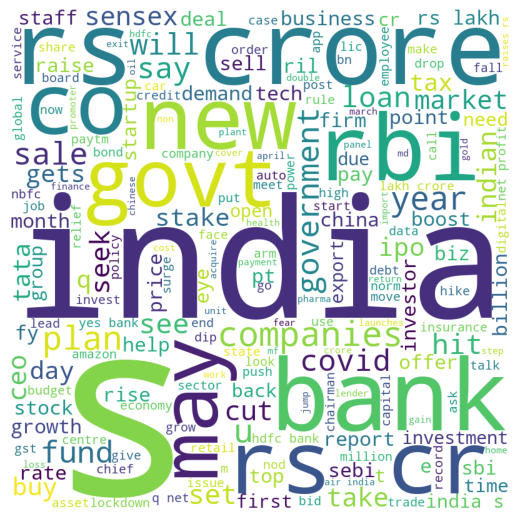

In [109]:
## Before extracting the BSE Sensex related texts
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

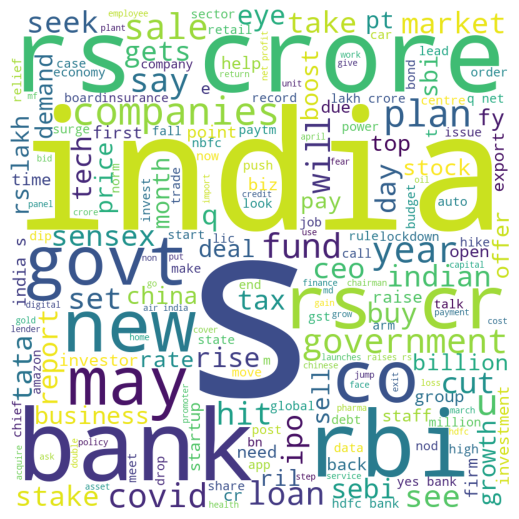

In [110]:
## After extracting the BSE Sensex related texts

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Observation: We can see the top words used in the news data during the targeted time period. 
### High usage of terms like 'covid','plan' ,'seek','cut','hit' gives us an insight of the companies strategies.
### Also, if compare the texts before extracting Sensex related news, there  isn't much clarity on the important words whereas extracting Sensex related news in a much more clear view of the keywords used.

# Building the Hybrid Model

#### We will add the sentiment of the texts to the original LSTM and see if there is an imporvement in the performance

In [111]:
##joining the text data to original data

hybrid_data = pd.merge(left=df,right=text3,left_on=df['Date'],right_on=text3['publish_date'],how='outer')

In [112]:
hybrid_data.head()

,key_0,Date,Open,High,Low,Close,Adj Close,Volume,publish_date,headline_category,headline_text
0,2005-06-30,2005-06-30,7154.270020,7218.279785,7154.270020,7193.850098,7193.850098,28600.0,NaT,NaN,NaN
1,2005-07-01,2005-07-01,7165.450195,7228.569824,7154.930176,7210.770020,7210.770020,12600.0,2005-07-01,business.india-business,bk birla group pens rs cr investment pla...
2,2005-07-02,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2005-07-02,business.india-business,retail boom triggers ancillary industry growth...
3,2005-07-03,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2005-07-03,business.india-business,india ideal for kpo industry airlines facing ...
4,2005-07-04,2005-07-04,7186.740234,7284.410156,7186.740234,7277.310059,7277.310059,9600.0,2005-07-04,business.india-business,global ceos indian owners why the strains ar...


In [113]:
hybrid_data.dropna(inplace=True)

In [114]:
# Taking only the necessary columns
hybrid_data = hybrid_data[['Date','Close','headline_text']].copy()

In [115]:
# Headlines

headlines = hybrid_data['headline_text'].apply('. '.join)

In [116]:
# Sentiment Score

scores = []

for sentence in headlines:
    sentiment = scores.append(sid.polarity_scores(sentence)['compound'])

In [117]:
hybrid_data['Sentiment'] = np.array(scores)

In [118]:
hybrid_data.isnull().sum()

Date             0
Close            0
headline_text    0
Sentiment        0
dtype: int64

## Blending the results 

In [119]:
stock_data = hybrid_data[["Close","Sentiment"]].copy()
stock_data = pd.DataFrame(stock_data)

In [120]:
## Train Test Split
train_data, test_data = stock_data[0:int(len(stock_data)*0.8)], stock_data[int(len(stock_data)*0.8):]

In [121]:
train_size,test_size

(3304, 368)

In [122]:
## Train and Validation data split

Xtrain, Xcv = train_data[0:int(len(train_data)*0.8)], train_data[int(len(train_data)*0.8):]

In [123]:
## Creating the dataset

def create_dataset(dataset, scoreset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        b = scoreset[i+look_back-1]
        dataX.append(np.append(a,b))
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [124]:
## Scaling the values

train_data_close = scaler.transform(Xtrain['Close'].values.reshape(-1,1))
test_data_close = scaler.transform(test_data['Close'].values.reshape(-1, 1))
cv_data_close = scaler.transform(Xcv['Close'].values.reshape(-1,1))

train_data_senti = scaler.transform(Xtrain['Sentiment'].values.reshape(-1,1))
test_data_senti = scaler.transform(test_data['Sentiment'].values.reshape(-1, 1))
cv_data_senti = scaler.transform(Xcv['Sentiment'].values.reshape(-1,1))

In [125]:
## Model the data

time_step = 60
Xtrain, ytrain = create_dataset(train_data_close,train_data_senti, time_step)
Xtest, ytest = create_dataset(test_data_close,test_data_senti, time_step)
Xcv,ycv = create_dataset(cv_data_close,cv_data_senti, time_step)

In [126]:
print(Xtrain.shape), print(ytrain.shape)

(2279, 61)
(2279,)


(None, None)

In [127]:
# reshape input to be [samples, time steps, features] which is required for LSTM

trainX, trainY = np.array(Xtrain), np.array(ytrain)
trainX = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))

cvX, cvY = np.array(Xcv), np.array(ycv)
cvX = np.reshape(Xcv, (Xcv.shape[0], Xcv.shape[1], 1))

testX, testY = np.array(Xtest), np.array(ytest)
testX = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

In [128]:
### Create the LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [129]:
#Defining our metric
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [130]:
hybrid_model = Sequential()
hybrid_model.add(LSTM(units=128, activation='tanh', kernel_initializer=tf.keras.initializers.glorot_uniform(seed=26), input_shape = (trainX.shape[1], 1), unroll = True))
hybrid_model.add(Dense(1, name="output_layer"))
hybrid_model.compile(optimizer = Adam(learning_rate=0.001), loss = root_mean_squared_error)

In [131]:
hybrid_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

In [132]:
hybrid_model.fit(trainX,trainY,validation_data=(cvX,cvY),epochs=100,batch_size=16,verbose=1)

Epoch 1/100


143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - loss: 0.0549 - val_loss: 0.0208
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0131 - val_loss: 0.0109
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - loss: 0.0111 - val_loss: 0.0093
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - loss: 0.0114 - val_loss: 0.0091
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 0.0116 - val_loss: 0.0102
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - loss: 0.0101 - val_loss: 0.0179
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0112 - val_loss: 0.0177
Epoch 8/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0097 - val_loss: 0.0115
Epoch 9/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0085 - val_loss: 0.0181
Epoch 10/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0094 - val_loss: 0.0098
Epoch 11/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0084 - val_loss: 0.0076
Epoch 12/100
143/143 ━━━━━━━━━━━━━━━━

In [133]:
### Prediction and check performance metrics
train_predict=hybrid_model.predict(trainX)
test_predict=hybrid_model.predict(testX)

72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [134]:
### Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [135]:
rescaled_ytrain = scaler.inverse_transform(trainY.reshape(-1, 1))
rescaled_ytest = scaler.inverse_transform(testY.reshape(-1, 1))

In [136]:
# report performance
mse = mean_squared_error(rescaled_ytest,test_predict)
print('MSE: '+str(mse))
mae = mean_absolute_error(rescaled_ytest,test_predict)
print('MAE: '+str(mae))
rmse = sqrt(mean_squared_error(rescaled_ytest,test_predict))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(test_predict - rescaled_ytest)/np.abs(rescaled_ytest))
print('MAPE: '+str(mape))

MSE: 252447.9254440927
MAE: 328.04297461065545
RMSE: 502.441962264392
MAPE: 0.009330480005018708


## Conclusion: With the help of sentiment analyzed from data, we were able to get a better result than the a individual LSTM model (Original Score was MAPE: 0.018136382770682885 which was optimised to MAPE: 0.009330480005018708). The performance improvement is marginally significant indicating a small but considerable effect of news data.

### Saving the models for future use

In [137]:
joblib.dump(sid,'Sentiment Analyzer')

['Sentiment Analyzer']

In [141]:
model_json = hybrid_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


In [140]:
joblib.dump(scaler,'MinMaxScaler')

['MinMaxScaler']